<a href="https://colab.research.google.com/github/NazrinIzwan/Webtech-Exercise2b/blob/main/Supervised_Data_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


In [2]:
# Load the data
file_path = "/content/Hours and Scores.csv"
hs_data = pd.read_csv(file_path)

In [3]:
# Drop unnecessary column
hs_data.pop('Unnamed: 0')

0     2.5,21
1     5.1,47
2     3.2,27
3     8.5,75
4     3.5,30
5     1.5,20
6     9.2,88
7     5.5,60
8     8.3,81
9     2.7,25
10    7.7,85
11    5.9,62
12    4.5,41
13    3.3,42
14    1.1,17
15    8.9,95
16    2.5,30
17    1.9,24
18    6.1,67
19    7.4,69
20    2.7,30
21    4.8,54
22    3.8,35
23    6.9,76
24    7.8,86
Name: Unnamed: 0, dtype: object

In [4]:
# Prepare the data
X = hs_data.iloc[:, :-1].values
y = hs_data.iloc[:, 1].values

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

In [11]:
# Make predictions
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 166ms/step


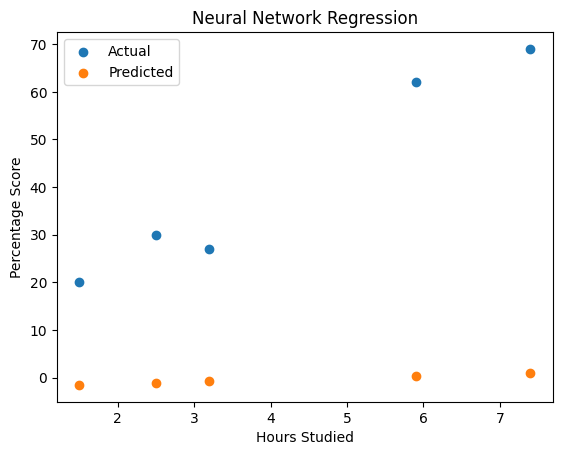

In [12]:
# Plot the results
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.title('Neural Network Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

In [13]:
# Evaluate the model
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae.numpy())

Mean Absolute Error: [43.102505 42.374107 40.574535 42.674034 41.217243]
